# Fresh Movies Challenge (Solutions)

In [1]:
# These are all of the libraries used for my solutions
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt

## Task 1: Exploratory Data Analysis

### How many unique movies are there in the dataset?
### How many ratings have been submitted?
### What is the date range over which ratings have been submitted?

In [2]:
# Reading in the movies table to a DataFrame
movies = pd.read_csv('movies.csv')

In [3]:
movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

The first ask was to find the total number of unique movies. You can do that by either using count on the dataframe as we know each movie is unique.

In [4]:
# Since each record is unique to a specific movie we can use the count method to return the total unique movies
movies.count()

movieId    9742
title      9742
genres     9742
dtype: int64

In [5]:
# nunique also works
movies['movieId'].nunique()

9742

In [6]:
# Reading in the ratings table to a DataFrame
ratings = pd.read_csv('ratings.csv')

In [7]:
ratings.head()

userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

In [8]:
# The count method will tell us how many ratings have been submitted
ratings.count()

userId       100836
movieId      100836
rating       100836
timestamp    100836
dtype: int64

In [9]:
# We need to convert the timestamp column to a datetime datatype
ratings.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [10]:
# The current format of timestamp is 10 digit unix in seconds, so we can convert using the to_datetime function
pd.to_datetime(ratings['timestamp'], unit='s')

0        2000-07-30 18:45:03
1        2000-07-30 18:20:47
2        2000-07-30 18:37:04
3        2000-07-30 19:03:35
4        2000-07-30 18:48:51
                 ...        
100831   2017-05-03 21:53:22
100832   2017-05-03 22:21:31
100833   2017-05-08 19:50:47
100834   2017-05-03 21:19:12
100835   2017-05-03 21:20:15
Name: timestamp, Length: 100836, dtype: datetime64[ns]

In [11]:
ratings['timestamp']=pd.to_datetime(ratings['timestamp'], unit='s')

In [12]:
# Use the min method to return the oldest rating submission
ratings['timestamp'].min()

Timestamp('1996-03-29 18:36:55')

In [13]:
# Use the max method to return the latest rating submission
ratings['timestamp'].max()

Timestamp('2018-09-24 14:27:30')

## Task 2: How many reviews are there for each year?

In [14]:
ratings.head()

userId  movieId  rating           timestamp
0       1        1     4.0 2000-07-30 18:45:03
1       1        3     4.0 2000-07-30 18:20:47
2       1        6     4.0 2000-07-30 18:37:04
3       1       47     5.0 2000-07-30 19:03:35
4       1       50     5.0 2000-07-30 18:48:51

In [15]:
ratings['timestamp'].dtype

dtype('<M8[ns]')

In [16]:
# Using the year method from the datetime module to extract the year from the timestamp column 
### ...and create a new year column
ratings['year']=ratings['timestamp'].dt.year

In [17]:
# Grouping on the year column and using a count aggregation
ratings.groupby(by='year').count().head(1)

userId  movieId  rating  timestamp
year                                    
1996    6040     6040    6040       6040

In [18]:
# We only need one numerical column and resetting the index  
ratings.groupby(by='year').count()['userId'].reset_index().head(1)

year  userId
0  1996    6040

In [19]:
# Storing this to a new variable object
ratings_by_year=ratings.groupby(by='year').count()['userId'].reset_index()

In [20]:
ratings_by_year.head(1)

year  userId
0  1996    6040

In [21]:
# Renaming the columns
ratings_by_year.rename(columns={'userId':'Num of Ratings', 'year':'Year'}, inplace=True)

<AxesSubplot:xlabel='Year'>

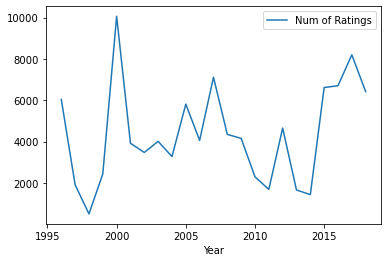

In [22]:
# Creating a simple plot using pandas
ratings_by_year.plot(x='Year', y='Num of Ratings')

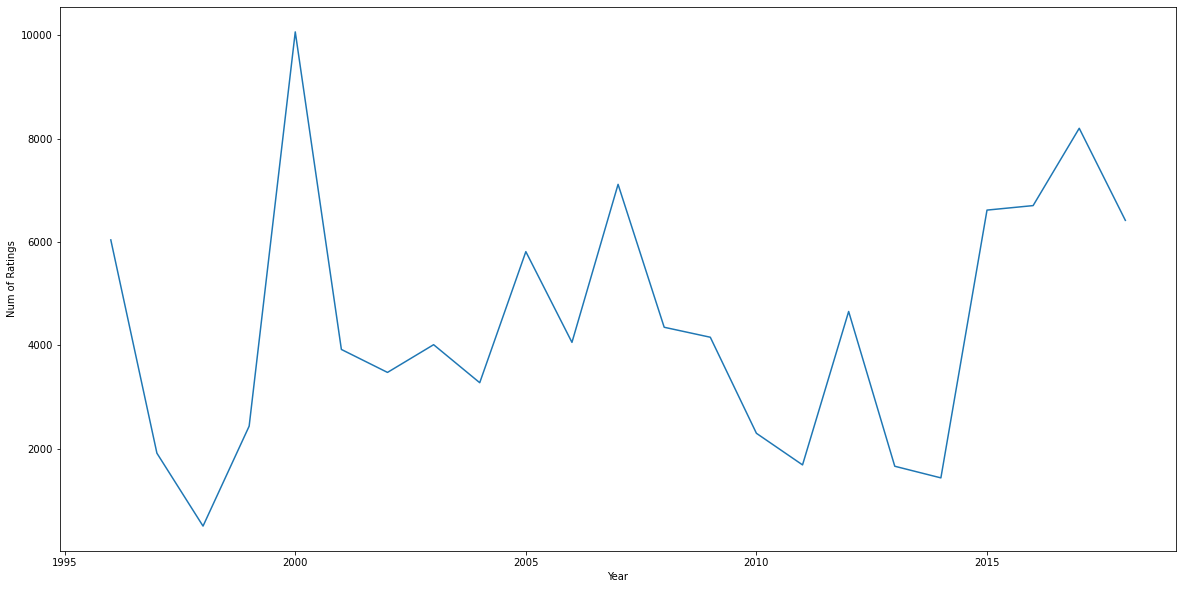

In [23]:
# Plotting with Seaborn
plt.figure(figsize=(20,10))
sns.lineplot(x=ratings_by_year['Year'],y=ratings_by_year['Num of Ratings'])
plt.show()

## Task 3: How many movies do not have a year of release?


* str.contains: https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html

* Regular Expression Syntax: https://docs.python.org/3/library/re.html

In [24]:
movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [25]:
# Finding records that do not contain the pattern of 4 digits in sequence
movies[movies['title'].str.contains(pat="\d{4}")==False]

movieId                                              title  \
6059    40697                                          Babylon 5   
9031   140956                                   Ready Player One   
9091   143410                                         Hyena Road   
9138   147250  The Adventures of Sherlock Holmes and Doctor W...   
9179   149334                                  Nocturnal Animals   
9259   156605                                           Paterson   
9367   162414                                          Moonlight   
9448   167570                                             The OA   
9514   171495                                             Cosmos   
9515   171631                            Maria Bamford: Old Baby   
9525   171891                                  Generation Iron 2   
9611   176601                                       Black Mirror   

                      genres  
6059                  Sci-Fi  
9031  Action|Sci-Fi|Thriller  
9091      (no genres listed)  
9138      (no genres listed)  
9179          Drama|Thriller  
9259      (no genres listed)  
9367                   Drama  
9448      (no genres listed)  
9514      (no genres listed)  
9515      (no genres listed)  
9525      (no genres listed)  
9611      (no genres listed)

In [26]:
# 12 records do not have a year of release
movies[movies['title'].str.contains(pat="\d{4}")==False].count()

movieId    12
title      12
genres     12
dtype: int64

In [27]:
movies['title'].nunique()

9737

In [28]:
# This is <1% of total unique movies
12/9737*100

0.12324124473657184

In [29]:
# We can change the boolean condition to True to store the resulting DF into a new variable
movies = movies[movies['title'].str.contains(pat="\d{4}")==True]

In [30]:
# All remaining movies have a year of release
movies[movies['title'].str.contains(pat="\d{4}")==False].count()

movieId    0
title      0
genres     0
dtype: int64

## Task 4: What are the most common genres?

## Return a table in descending order showing the total movies for each genre, create a simple visualize for this. 

### A single film is allowed to have multiple genres.

In [31]:
movies.head(2)

movieId             title                                       genres
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy
1        2    Jumanji (1995)                   Adventure|Children|Fantasy

In [32]:
# We can use the split method to convert a string to a list with a seperator
'one|two|three'.split('|')

['one', 'two', 'three']

In [33]:
# Combining apply with lambda expressions utilising the split method to convert each value in the genres column into a list
movies['genres'].apply(lambda x : x.split('|'))

0       [Adventure, Animation, Children, Comedy, Fantasy]
1                          [Adventure, Children, Fantasy]
2                                       [Comedy, Romance]
3                                [Comedy, Drama, Romance]
4                                                [Comedy]
                              ...                        
9737                 [Action, Animation, Comedy, Fantasy]
9738                         [Animation, Comedy, Fantasy]
9739                                              [Drama]
9740                                  [Action, Animation]
9741                                             [Comedy]
Name: genres, Length: 9730, dtype: object

In [34]:
# Creating a new genres list column
movies['genres list'] = movies['genres'].apply(lambda x : x.split('|'))

In [35]:
movies

movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                                           genres  \
0     Adventure|Animation|Children|Comedy|Fantasy   
1                      Adventure|Children|Fantasy   
2                                  Comedy|Romance   
3                            Comedy|Drama|Romance   
4                                          Comedy   
...                                           ...   
9737              Action|Animation|Comedy|Fantasy   
9738                     Animation|Comedy|Fantasy   
9739                                        Drama   
9740                             Action|Animation   
9741                                       Comedy   

                                            genres list  
0     [Adventure, Animation, Children, Comedy, Fantasy]  
1                        [Adventure, Children, Fantasy]  
2                                     [Comedy, Romance]  
3                              [Comedy, Drama, Romance]  
4                                              [Comedy]  
...                                                 ...  
9737               [Action, Animation, Comedy, Fantasy]  
9738                       [Animation, Comedy, Fantasy]  
9739                                            [Drama]  
9740                                [Action, Animation]  
9741                                           [Comedy]  

[9730 rows x 4 columns]

* Explode: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html

In [36]:
# The explode method can repeat indexes and put each element of a list into its own row 
movies.explode('genres list')

movieId                                title  \
0           1                     Toy Story (1995)   
0           1                     Toy Story (1995)   
0           1                     Toy Story (1995)   
0           1                     Toy Story (1995)   
0           1                     Toy Story (1995)   
...       ...                                  ...   
9738   193583         No Game No Life: Zero (2017)   
9739   193585                         Flint (2017)   
9740   193587  Bungo Stray Dogs: Dead Apple (2018)   
9740   193587  Bungo Stray Dogs: Dead Apple (2018)   
9741   193609  Andrew Dice Clay: Dice Rules (1991)   

                                           genres genres list  
0     Adventure|Animation|Children|Comedy|Fantasy   Adventure  
0     Adventure|Animation|Children|Comedy|Fantasy   Animation  
0     Adventure|Animation|Children|Comedy|Fantasy    Children  
0     Adventure|Animation|Children|Comedy|Fantasy      Comedy  
0     Adventure|Animation|Children|Comedy|Fantasy     Fantasy  
...                                           ...         ...  
9738                     Animation|Comedy|Fantasy     Fantasy  
9739                                        Drama       Drama  
9740                             Action|Animation      Action  
9740                             Action|Animation   Animation  
9741                                       Comedy      Comedy  

[22069 rows x 4 columns]

In [37]:
# Gouping by genres list and assigining the result into a dataframe called df
df = movies.explode('genres list').groupby('genres list').count()['movieId']

In [38]:
# Resetting the index and renaming columns
df = df.reset_index().rename(columns={'movieId':'total count'})

In [39]:
# Sorting in descending order of total count
df.sort_values(by='total count', ascending=False, inplace=True)

In [40]:
df

genres list  total count
8                Drama         4359
5               Comedy         3756
17            Thriller         1892
1               Action         1827
15             Romance         1596
2            Adventure         1263
6                Crime         1199
16              Sci-Fi          978
11              Horror          978
9              Fantasy          779
4             Children          664
3            Animation          611
14             Mystery          573
7          Documentary          440
18                 War          382
13             Musical          334
19             Western          167
12                IMAX          158
10           Film-Noir           87
0   (no genres listed)           26

In [41]:
# If you dont have plotly installed you can use the following command

# conda install plotly

In [42]:
# Creating a treemap on plotly to visualize the genres and counts
px.treemap(data_frame=df, path=[df['genres list']], 
           values=df['total count'], 
           color=df['total count'], 
           color_continuous_scale='RdBu')

## Task 5: Return a table containing the top 10 highest rated movies by average rating.

## The movies must have at least 50 reviews to be eligible

In [43]:
movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  \
0  Adventure|Animation|Children|Comedy|Fantasy   
1                   Adventure|Children|Fantasy   
2                               Comedy|Romance   
3                         Comedy|Drama|Romance   
4                                       Comedy   

                                         genres list  
0  [Adventure, Animation, Children, Comedy, Fantasy]  
1                     [Adventure, Children, Fantasy]  
2                                  [Comedy, Romance]  
3                           [Comedy, Drama, Romance]  
4                                           [Comedy]

In [44]:
ratings.head()

userId  movieId  rating           timestamp  year
0       1        1     4.0 2000-07-30 18:45:03  2000
1       1        3     4.0 2000-07-30 18:20:47  2000
2       1        6     4.0 2000-07-30 18:37:04  2000
3       1       47     5.0 2000-07-30 19:03:35  2000
4       1       50     5.0 2000-07-30 18:48:51  2000

* merge: https://pandas.pydata.org/docs/reference/api/pandas.merge.html

In [45]:
# Merging movies and ratings tables via the common movieId key
movies_ratings = movies[['movieId','title']].merge(right=ratings[['movieId','rating']],left_on='movieId',right_on='movieId')

* pivot_table: https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html~

In [46]:
# Using the pivot_table method to pivot and return the count/mean ratings for each movie
movies_ratings = movies_ratings[['title','rating']].pivot_table(index='title', aggfunc=['count','mean'])

In [47]:
movies_ratings

count      mean
                                          rating    rating
title                                                     
'71 (2014)                                     1  4.000000
'Hellboy': The Seeds of Creation (2004)        1  4.000000
'Round Midnight (1986)                         2  3.500000
'Salem's Lot (2004)                            1  5.000000
'Til There Was You (1997)                      2  4.000000
...                                          ...       ...
eXistenZ (1999)                               22  3.863636
xXx (2002)                                    24  2.770833
xXx: State of the Union (2005)                 5  2.000000
¡Three Amigos! (1986)                         26  3.134615
À nous la liberté (Freedom for Us) (1931)      1  1.000000

[9707 rows x 2 columns]

In [48]:
# Dropping level 1 from the column hierarchy
movies_ratings.columns=movies_ratings.columns.droplevel(1)

In [49]:
movies_ratings

count      mean
title                                                     
'71 (2014)                                     1  4.000000
'Hellboy': The Seeds of Creation (2004)        1  4.000000
'Round Midnight (1986)                         2  3.500000
'Salem's Lot (2004)                            1  5.000000
'Til There Was You (1997)                      2  4.000000
...                                          ...       ...
eXistenZ (1999)                               22  3.863636
xXx (2002)                                    24  2.770833
xXx: State of the Union (2005)                 5  2.000000
¡Three Amigos! (1986)                         26  3.134615
À nous la liberté (Freedom for Us) (1931)      1  1.000000

[9707 rows x 2 columns]

In [50]:
# Resetting the index
movies_ratings=movies_ratings.reset_index()

In [51]:
# Removing all movies with less than 50 movies
movies_ratings=movies_ratings[movies_ratings['count']>=50]

In [52]:
# Top 20 movies in descending rating order
movies_ratings.sort_values(by='mean', ascending=False).head(20)

title  count      mean
7583                   Shawshank Redemption, The (1994)    317  4.429022
3495                              Godfather, The (1972)    192  4.289062
3008                                  Fight Club (1999)    218  4.272936
1959                              Cool Hand Luke (1967)     57  4.271930
2528  Dr. Strangelove or: How I Learned to Stop Worr...     97  4.268041
6989                                 Rear Window (1954)     84  4.261905
3496                     Godfather: Part II, The (1974)    129  4.259690
2331                               Departed, The (2006)    107  4.252336
3560                                  Goodfellas (1990)    126  4.250000
1591                                  Casablanca (1942)    100  4.240000
2160                            Dark Knight, The (2008)    149  4.238255
9107                         Usual Suspects, The (1995)    204  4.237745
6799                         Princess Bride, The (1987)    142  4.232394
7991          Star Wars: Episode IV - A New Hope (1977)    251  4.231076
7411                            Schindler's List (1993)    220  4.225000
563                               Apocalypse Now (1979)    107  4.219626
420                           American History X (1998)    129  4.217054
7992  Star Wars: Episode V - The Empire Strikes Back...    211  4.215640
1734                                   Chinatown (1974)     59  4.211864
6935  Raiders of the Lost Ark (Indiana Jones and the...    200  4.207500